In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('c:/Users/neeli/Downloads/upgrad/linear_regression/assignment/day.csv',low_memory=False)


In [3]:
#Inspect first few rows
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the details of numeriacl data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking for the null values in column data
bikeSharing_df.isnull().sum()

#based on the below output it says there are no missing values in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#dropping columns with all NAN values
bikeSharing_df=bikeSharing_df.dropna(axis=1, how='all')
bikeSharing_df.shape

(730, 16)

In [10]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)


In [11]:


# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [12]:

bikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [14]:
# renaming few columns for better readibility

bikeSharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [15]:

#droping duplicate rows 
bikeSharing_df.drop_duplicates(inplace=True)
#As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well

In [16]:
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Encoding/mapping the season column

bikeSharing_df.season = bikeSharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [18]:
# Encoding/mapping the month column

bikeSharing_df.month = bikeSharing_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [19]:
# Encoding/mapping the weekday column

bikeSharing_df.weekday = bikeSharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [20]:
# Encoding/mapping the weathersit column

bikeSharing_df.weathersit = bikeSharing_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [21]:
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bikeSharing_df.year.value_counts()

0    365
1    365
Name: year, dtype: int64

In [23]:
bikeSharing_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

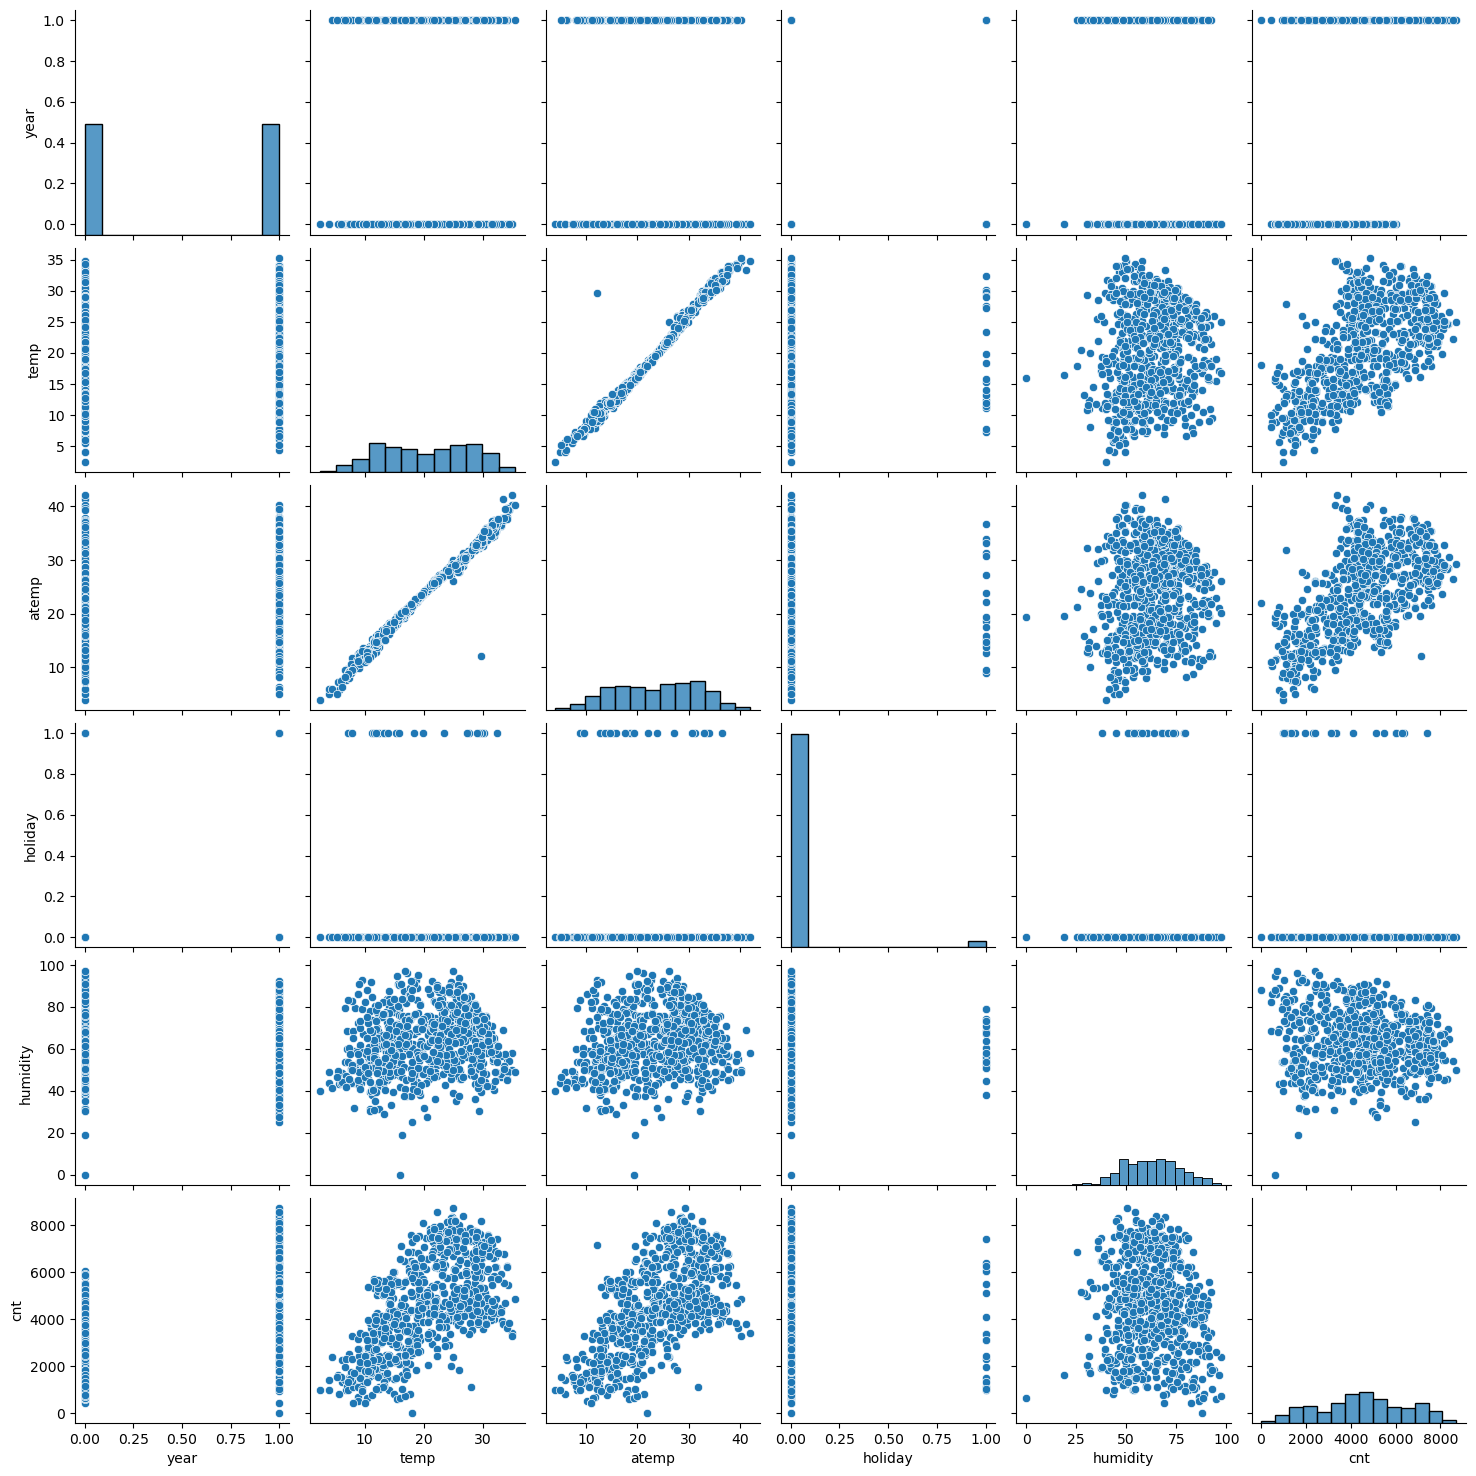

In [24]:
#Draw pair Plots to check the linear relationship
sns.pairplot(data=bikeSharing_df,vars=['year','temp','atemp','holiday','humidity','cnt'])
plt.show()

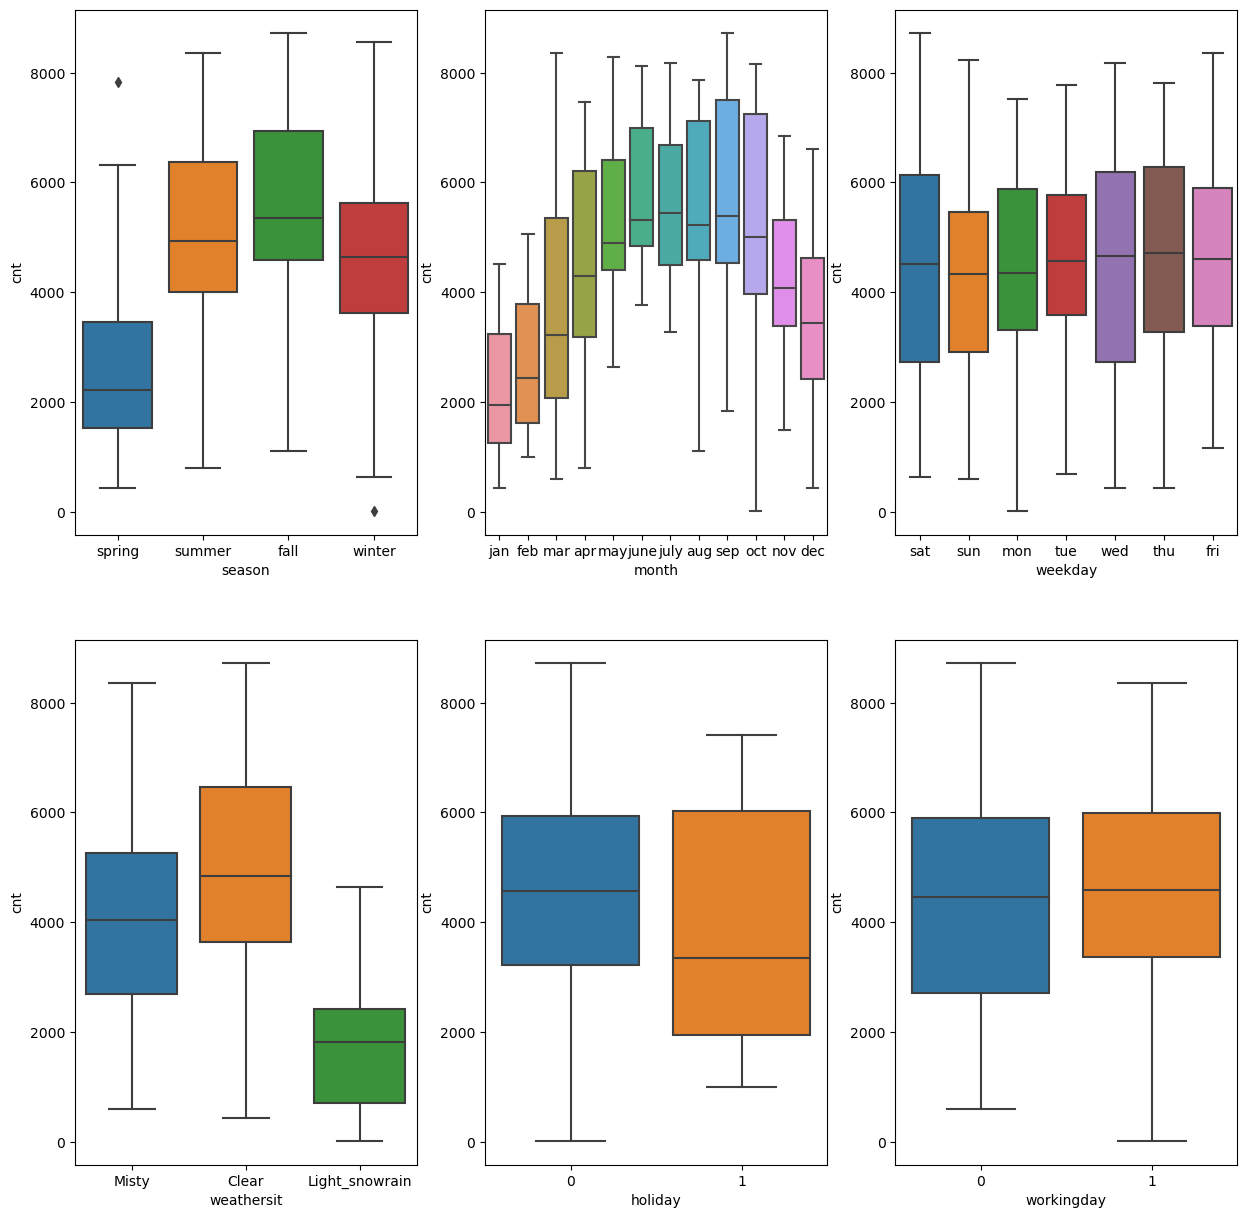

In [25]:
#visualize categorical variables
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bikeSharing_df)
plt.subplot(2,3,2)
sns.boxplot(x='month',y='cnt', data=bikeSharing_df)
plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt', data=bikeSharing_df)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt', data=bikeSharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing_df)
plt.show()

In [26]:
bikeSharing_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [27]:
#Create Dummy variable and Drop first dummy variable for each set of dummies created
season_dummy=pd.get_dummies(bikeSharing_df['season'],drop_first=True)
season_dummy.head()
bikeSharing_df=pd.concat([bikeSharing_df,season_dummy],axis=1)
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,summer,winter
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [28]:
#Create Dummy variable and Drop first dummy variable for each set of dummies created
month_dummy=pd.get_dummies(bikeSharing_df['month'],drop_first=True)
month_dummy.head()
bikeSharing_df=pd.concat([bikeSharing_df,month_dummy],axis=1)
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [29]:
#Create Dummy variable and Drop first dummy variable for each set of dummies created
weekday_dummy=pd.get_dummies(bikeSharing_df['weekday'],drop_first=True)
weekday_dummy.head()
bikeSharing_df=pd.concat([bikeSharing_df,weekday_dummy],axis=1)
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,...,0,0,0,0,0,1,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,...,0,0,0,0,0,0,1,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,0,1,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,1


In [30]:
#Create Dummy variable and Drop first dummy variable for each set of dummies created
weathersit_dummy=pd.get_dummies(bikeSharing_df['weathersit'],drop_first=True)
weathersit_dummy.head()
bikeSharing_df=pd.concat([bikeSharing_df,weathersit_dummy],axis=1)
bikeSharing_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,...,0,0,0,1,0,0,0,0,0,1
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,...,0,0,0,0,1,0,0,0,0,1
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,1,0,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [31]:
#Drop the categorical columns as the dummy variables were created
bikeSharing_df=bikeSharing_df.drop(['dteday','season','month','weekday'],axis=1)
bikeSharing_df.head()

,year,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [32]:

bikeSharing_df.head()

,year,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#Drop the categorical columns as the dummy variables were created
bikeSharing_df=bikeSharing_df.drop(['weathersit'],axis=1)
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
bikeSharing_df.shape

(730, 30)

In [35]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [36]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing_df, train_size = 0.7, random_state = 100)

In [37]:
df_train.shape

(510, 30)

In [38]:
df_test.shape

(220, 30)

In [39]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [40]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty'],
      dtype='object')

In [41]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty'],
      dtype='object')

In [42]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# Apply scaler() to all the numeric variables

num_vars = ['year','holiday','workingday','temp','atemp', 'humidity', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


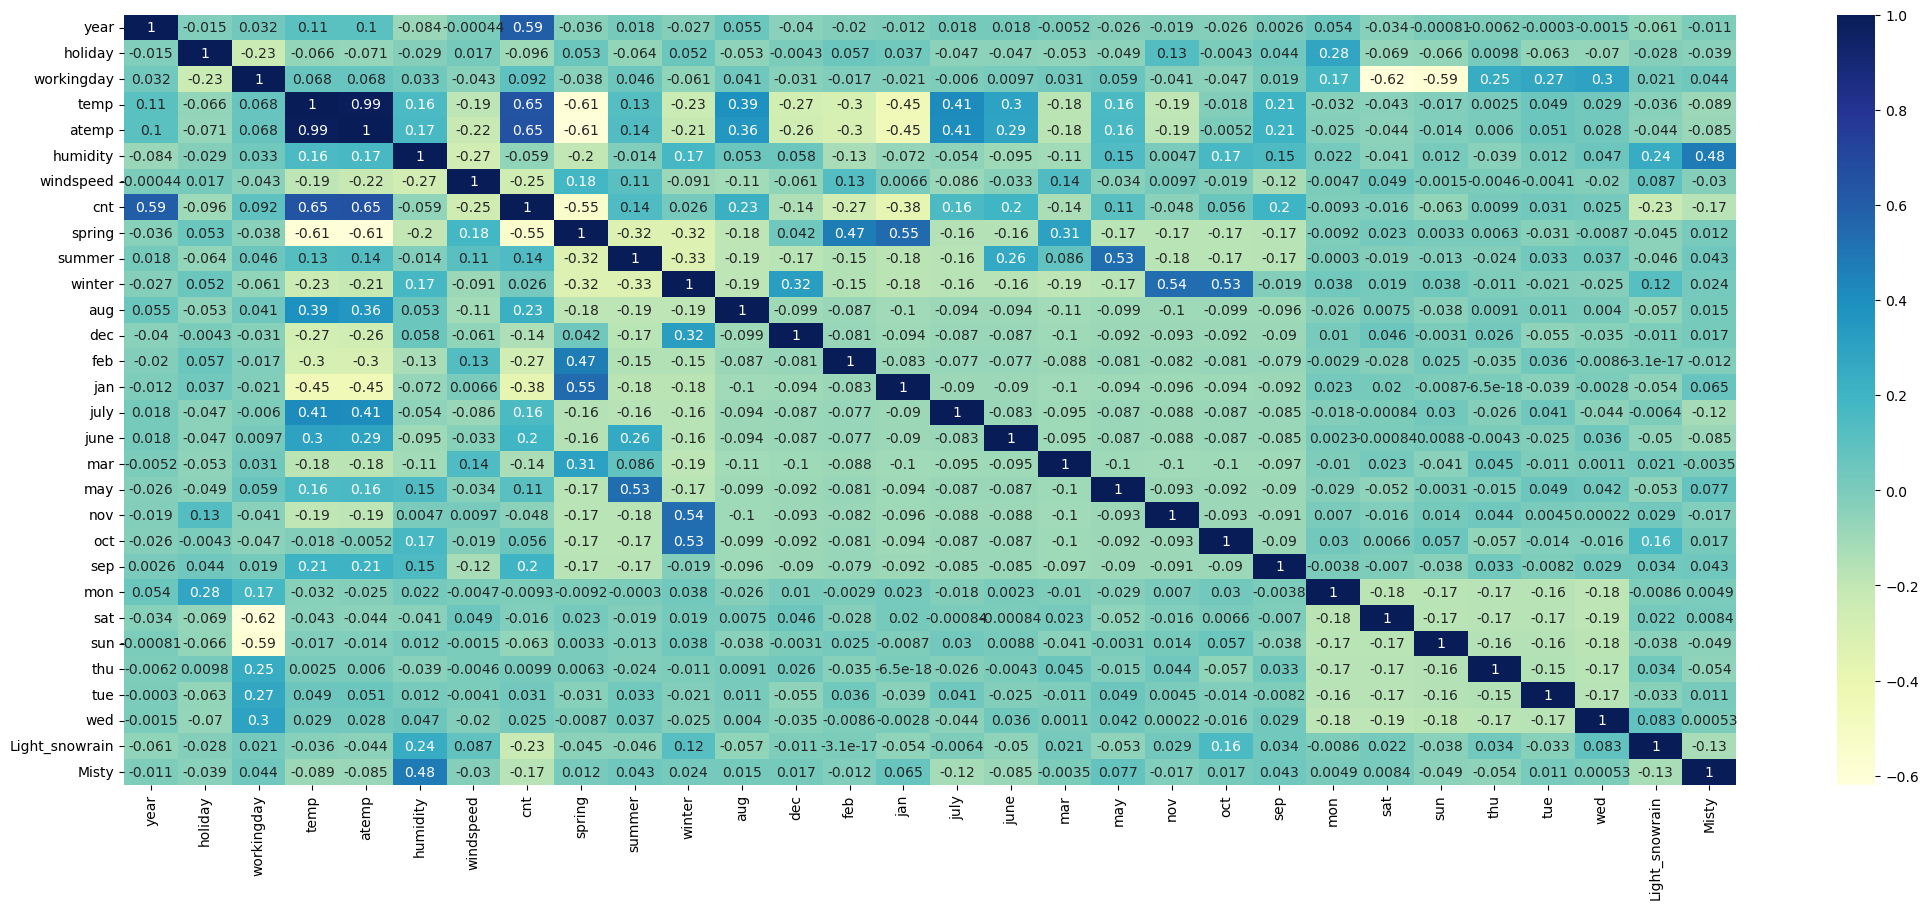

In [44]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(26,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [45]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   holiday         510 non-null    float64
 2   workingday      510 non-null    float64
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   spring          510 non-null    uint8  
 8   summer          510 non-null    uint8  
 9   winter          510 non-null    uint8  
 10  aug             510 non-null    uint8  
 11  dec             510 non-null    uint8  
 12  feb             510 non-null    uint8  
 13  jan             510 non-null    uint8  
 14  july            510 non-null    uint8  
 15  june            510 non-null    uint8  
 16  mar             510 non-null    uint8  
 17  may             510 non-null    u

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', False, 2),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', False, 2),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2)]

In [48]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'spring', 'jan', 'july', 'nov', 'sat', 'sun',
       'Light_snowrain'],
      dtype='object')

In [49]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'oct',
       'sep', 'mon', 'thu', 'tue', 'wed', 'Misty'],
      dtype='object')

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,51.28
3,temp,50.90
2,workingday,36.12
11,sat,8.82
12,sun,8.43
1,holiday,2.37
7,spring,2.18
8,jan,1.53
9,july,1.27
5,humidity,1.24


In [51]:
#Building model using statsmodel, for the detailed statistics
import statsmodels.api as sm 

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.10e-177
Time:                        19:42:08   Log-Likelihood:                 481.54
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     496   BIC:                            -875.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3275      0.025     13.042      0.000       0.278       0.377
year               0.2307      0.009     26.902      0.000       0.214       0.248
holiday            0.0286      0.023      1.264      0.207      -0.016       0.073
workingday         0.1081      0.010     11.191      0.000       0.089       0.127
temp               0.2708      0.134      2.026      0.043       0.008       0.533
atemp              0.1735      0.143      1.217      0.224      -0.107       0.454
humidity          -0.2352      0.032     -7.277      0.000      -0.299      -0.172
windspeed         -0.2078      0.027     -7.642      0.000      -0.261      -0.154
spring            -0.1319      0.015     -9.070      0.000      -0.160      -0.103
jan               -0.0501      0.018     -2.717      0.007      -0.086      -0.014
july              -0.0851      0.018     -4.752      0.000      -0.120      -0.050
nov                0.0009      0.017      0.055      0.956      -0.032       0.034
sat                0.1192      0.012     10.021      0.000       0.096       0.143
sun                0.0716      0.012      5.804      0.000       0.047       0.096
Light_snowrain    -0.1946      0.026     -7.360      0.000      -0.247      -0.143
==============================================================================
Omnibus:                       50.309   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.346
Skew:                          -0.613   Prob(JB):                     1.46e-20
Kurtosis:                       4.672   Cond. No.                     1.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
#atemp is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           510 non-null    float64
 1   year            510 non-null    float64
 2   holiday         510 non-null    float64
 3   workingday      510 non-null    float64
 4   temp            510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   spring          510 non-null    uint8  
 8   jan             510 non-null    uint8  
 9   july            510 non-null    uint8  
 10  nov             510 non-null    uint8  
 11  sat             510 non-null    uint8  
 12  sun             510 non-null    uint8  
 13  Light_snowrain  510 non-null    uint8  
dtypes: float64(7), uint8(7)
memory usage: 35.4 KB


In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\neeli\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\neeli\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
11,sat,inf
12,sun,inf
4,temp,2.38
7,spring,2.18
8,jan,1.53
9,july,1.27
5,humidity,1.24
10,nov,1.24


In [54]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.08e-178
Time:                        19:42:35   Log-Likelihood:                 480.78
No. Observations:                 510   AIC:                            -935.6
Df Residuals:                     497   BIC:                            -880.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3306      0.025     13.

In [55]:
#nov is insignificant in presence of other variables; can be dropped
X_train_new1 = X_train_lm.drop(["nov"], axis = 1)

In [56]:
X_train_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           510 non-null    float64
 1   year            510 non-null    float64
 2   holiday         510 non-null    float64
 3   workingday      510 non-null    float64
 4   temp            510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   spring          510 non-null    uint8  
 8   jan             510 non-null    uint8  
 9   july            510 non-null    uint8  
 10  sat             510 non-null    uint8  
 11  sun             510 non-null    uint8  
 12  Light_snowrain  510 non-null    uint8  
dtypes: float64(7), uint8(6)
memory usage: 34.9 KB


In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\neeli\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\neeli\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
10,sat,inf
11,sun,inf
4,temp,2.05
7,spring,1.94
8,jan,1.52
9,july,1.26
5,humidity,1.24
6,windspeed,1.15


In [ ]:
#VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [58]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.08e-179
Time:                        19:42:55   Log-Likelihood:                 480.78
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     498   BIC:                            -886.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3312      0.024     13.

In [59]:
#holiday is insignificant in presence of other variables; can be dropped
X_train_new2 = X_train_new1.drop(["holiday"], axis = 1)
X_train_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           510 non-null    float64
 1   year            510 non-null    float64
 2   workingday      510 non-null    float64
 3   temp            510 non-null    float64
 4   humidity        510 non-null    float64
 5   windspeed       510 non-null    float64
 6   spring          510 non-null    uint8  
 7   jan             510 non-null    uint8  
 8   july            510 non-null    uint8  
 9   sat             510 non-null    uint8  
 10  sun             510 non-null    uint8  
 11  Light_snowrain  510 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 30.9 KB


In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.47
2,workingday,8.97
9,sat,6.01
10,sun,5.70
3,temp,2.05
6,spring,1.94
7,jan,1.52
8,july,1.26
4,humidity,1.24
5,windspeed,1.15


In [ ]:
#VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [61]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.08e-179
Time:                        19:43:14   Log-Likelihood:                 480.78
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     498   BIC:                            -886.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3600      0.039      9.

In [62]:
# As const shows high VIF values hence we can drop it
X_train_new3 = X_train_new2.drop(['const'], axis = 1)

In [63]:
X_train_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   workingday      510 non-null    float64
 2   temp            510 non-null    float64
 3   humidity        510 non-null    float64
 4   windspeed       510 non-null    float64
 5   spring          510 non-null    uint8  
 6   jan             510 non-null    uint8  
 7   july            510 non-null    uint8  
 8   sat             510 non-null    uint8  
 9   sun             510 non-null    uint8  
 10  Light_snowrain  510 non-null    uint8  
dtypes: float64(5), uint8(6)
memory usage: 26.9 KB


In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,17.63
1,workingday,15.98
2,temp,12.20
4,windspeed,4.50
8,sat,4.33
9,sun,4.16
5,spring,2.38
0,year,2.07
6,jan,1.65
7,july,1.37


In [65]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.08e-179
Time:                        19:43:32   Log-Likelihood:                 480.78
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     498   BIC:                            -886.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3600      0.039      9.

In [66]:
# As const shows high VIF values hence we can drop it
X_train_new4 = X_train_new3.drop(['humidity'], axis = 1)

X_train_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   workingday      510 non-null    float64
 2   temp            510 non-null    float64
 3   windspeed       510 non-null    float64
 4   spring          510 non-null    uint8  
 5   jan             510 non-null    uint8  
 6   july            510 non-null    uint8  
 7   sat             510 non-null    uint8  
 8   sun             510 non-null    uint8  
 9   Light_snowrain  510 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 22.9 KB


In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.46
1,workingday,10.08
3,windspeed,4.48
7,sat,3.03
8,sun,2.82
4,spring,2.37
0,year,2.06
5,jan,1.63
6,july,1.30
9,Light_snowrain,1.05


In [68]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.08e-170
Time:                        19:43:51   Log-Likelihood:                 455.44
No. Observations:                 510   AIC:                            -888.9
Df Residuals:                     499   BIC:                            -842.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2019      0.034      6.

In [69]:
# As const shows high VIF values hence we can drop it
X_train_new5 = X_train_new4.drop(['temp'], axis = 1)

X_train_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   workingday      510 non-null    float64
 2   windspeed       510 non-null    float64
 3   spring          510 non-null    uint8  
 4   jan             510 non-null    uint8  
 5   july            510 non-null    uint8  
 6   sat             510 non-null    uint8  
 7   sun             510 non-null    uint8  
 8   Light_snowrain  510 non-null    uint8  
dtypes: float64(3), uint8(6)
memory usage: 18.9 KB


In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.47
1,workingday,3.93
0,year,2.01
3,spring,2.01
6,sat,1.73
7,sun,1.64
4,jan,1.59
5,july,1.12
8,Light_snowrain,1.05


In [71]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.02e-132
Time:                        19:44:09   Log-Likelihood:                 364.98
No. Observations:                 510   AIC:                            -710.0
Df Residuals:                     500   BIC:                            -667.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4351      0.035     12.

In [72]:
# As const shows high VIF values hence we can drop it
X_train_new6 = X_train_new5.drop(['sun'], axis = 1)

X_train_new6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   workingday      510 non-null    float64
 2   windspeed       510 non-null    float64
 3   spring          510 non-null    uint8  
 4   jan             510 non-null    uint8  
 5   july            510 non-null    uint8  
 6   sat             510 non-null    uint8  
 7   Light_snowrain  510 non-null    uint8  
dtypes: float64(3), uint8(5)
memory usage: 18.4 KB


In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.35
1,workingday,2.79
3,spring,2.01
0,year,1.86
4,jan,1.59
6,sat,1.45
5,july,1.09
7,Light_snowrain,1.05


In [74]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.65e-133
Time:                        19:44:25   Log-Likelihood:                 364.21
No. Observations:                 510   AIC:                            -710.4
Df Residuals:                     501   BIC:                            -672.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4728      0.018     26.

In [75]:
# As const shows high VIF values hence we can drop it
X_train_new7 = X_train_new6.drop(['july'], axis = 1)

X_train_new7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    float64
 1   workingday      510 non-null    float64
 2   windspeed       510 non-null    float64
 3   spring          510 non-null    uint8  
 4   jan             510 non-null    uint8  
 5   sat             510 non-null    uint8  
 6   Light_snowrain  510 non-null    uint8  
dtypes: float64(3), uint8(4)
memory usage: 17.9 KB


In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.35
1,workingday,2.75
3,spring,1.98
0,year,1.85
4,jan,1.59
5,sat,1.44
6,Light_snowrain,1.05


In [77]:
#Rebuilding the model without nov
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new7)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.32e-133
Time:                        19:44:41   Log-Likelihood:                 361.73
No. Observations:                 510   AIC:                            -707.5
Df Residuals:                     502   BIC:                            -673.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4787      0.017     27.

In [78]:
# Checking the parameters and their coefficient values
lm.params

const             0.478749
year              0.251602
workingday        0.054250
windspeed        -0.206892
spring           -0.223083
jan              -0.116423
sat               0.060642
Light_snowrain   -0.279348
dtype: float64

In [ ]:
#We can cosider the above model , as it seems to have very low multicolinearity between the predictors and 
#the p-values for all the predictors seems to be significant.

#F-Statistics value of 182.6 (which is greater than 1) and the p-value of 1.32e-133 i.e almost equals to zero, states that 
#the overall model is significant

In [79]:
#Residual Analysis of the train data
y_train_pred = lm.predict(X_train_lm)
print(y_train_pred)

576    0.729841
426    0.515082
728    0.370077
482    0.752000
111    0.454178
         ...   
578    0.745884
53     0.286873
350    0.450052
79     0.423372
520    0.710204
Length: 510, dtype: float64


In [80]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\neeli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

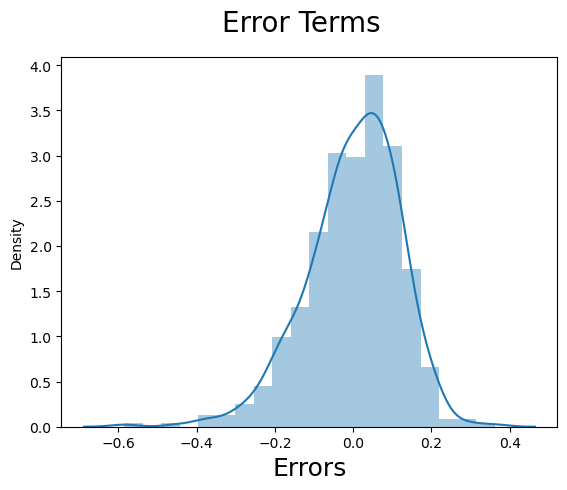

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [82]:
# Applying scaling on the test dataset
num_vars = ['year','holiday','workingday','temp','atemp', 'humidity', 'windspeed','cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [83]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
X_test_new.head()

,const,year,workingday,windspeed,spring,jan,sat,Light_snowrain
184,1.0,0.0,0.0,0.084219,0,0,0,0
535,1.0,1.0,1.0,0.153728,0,0,0,0
299,1.0,0.0,1.0,0.334206,0,0,0,0
221,1.0,0.0,1.0,0.339570,0,0,0,0
152,1.0,0.0,1.0,0.537414,0,0,0,0


In [87]:
# Making predictions
y_pred= lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

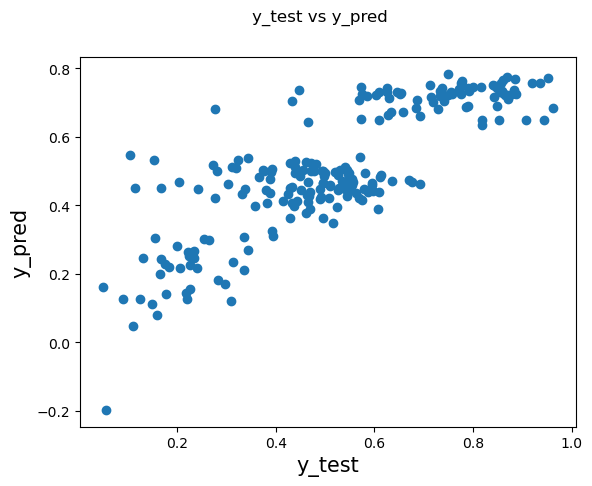

In [88]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=12)              # Plot heading 
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('y_pred', fontsize=15)                          # Y-label

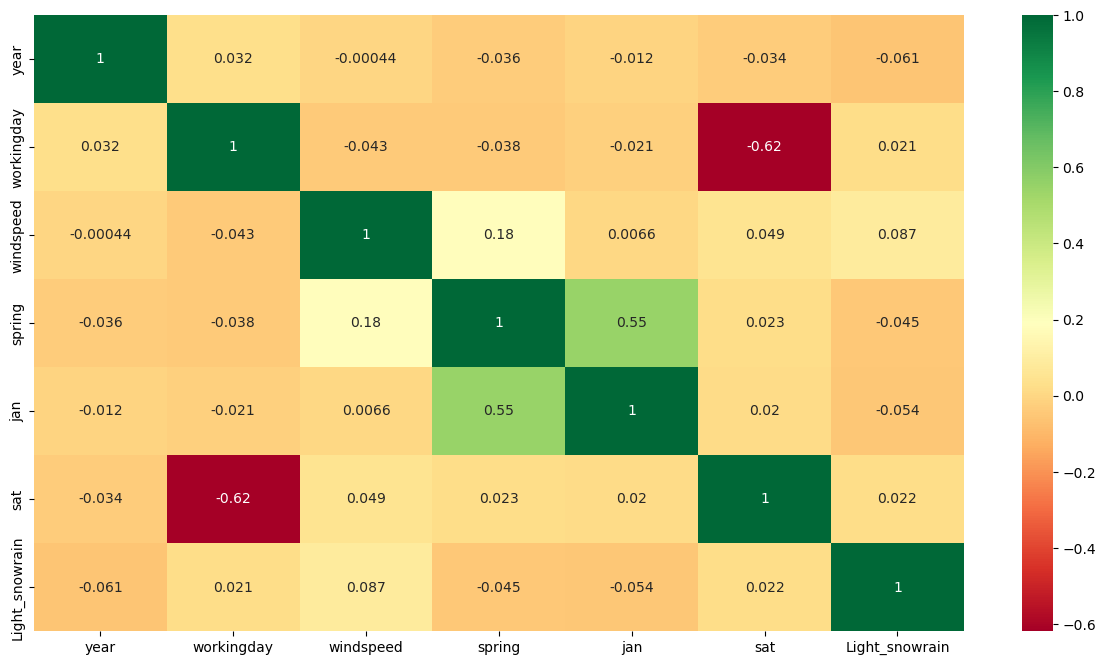

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new7.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [ ]:
#VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap

In [93]:
#R^2 Value for TEST
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.6784021954044422

In [94]:
#Adjusted R^2 Value for TEST

# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.629316214703015

In [ ]:
Final Result Comparison
Train R^2 :0.824
Train Adjusted R^2 :0.821
Test R^2 :0.820
Test Adjusted R^2 :0.812
This seems to be a really good model that can very well 'Generalize' various datasets.